# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: Bhagwaan Bharose

YOUR-ID: 

YOUR-NAME: Tushar Choudhary

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
from helpers.func import make_gaussian

# Hyper-parameters
num_iter = 10
alpha = 0.001
tol = 0.001

# The cost function value vs the number of iterations
# The Ground Truth data values and the predicted data values.

    
# 𝑥𝑜𝑏𝑠=𝑛𝑝.𝑙𝑖𝑛𝑠𝑝𝑎𝑐𝑒(−25,25,𝑛𝑢𝑚_𝑜𝑏𝑠)
# 𝑦𝑜𝑏𝑠=𝑦(𝑥𝑜𝑏𝑠;𝑎𝑔𝑡,𝑚𝑔𝑡,𝑠𝑔𝑡)
# from (1)

## Generating data

[-25.         -23.97959184 -22.95918367 -21.93877551 -20.91836735
 -19.89795918 -18.87755102 -17.85714286 -16.83673469 -15.81632653
 -14.79591837 -13.7755102  -12.75510204 -11.73469388 -10.71428571
  -9.69387755  -8.67346939  -7.65306122  -6.63265306  -5.6122449
  -4.59183673  -3.57142857  -2.55102041  -1.53061224  -0.51020408
   0.51020408   1.53061224   2.55102041   3.57142857   4.59183673
   5.6122449    6.63265306   7.65306122   8.67346939   9.69387755
  10.71428571  11.73469388  12.75510204  13.7755102   14.79591837
  15.81632653  16.83673469  17.85714286  18.87755102  19.89795918
  20.91836735  21.93877551  22.95918367  23.97959184  25.        ] [0.09132454 0.09721194 0.10320986 0.10929299 0.11543377 0.12160263
 0.12776813 0.13389724 0.13995557 0.14590772 0.15171755 0.1573486
 0.1627644  0.16792891 0.17280688 0.17736424 0.18156854 0.18538929
 0.18879834 0.19177023 0.19428251 0.19631602 0.1978551  0.19888785
 0.19940625 0.19940625 0.19888785 0.1978551  0.19631602 0.19428251
 0.191

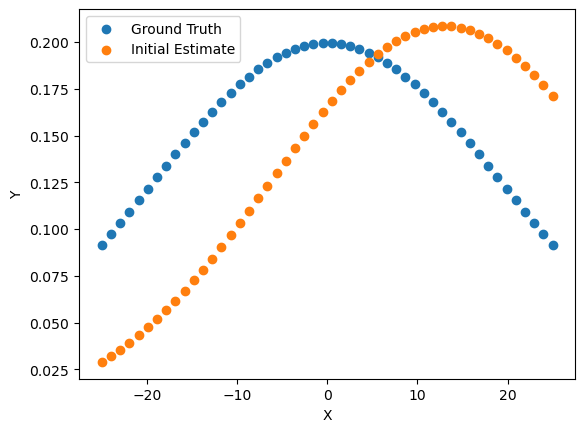

In [45]:
xobs = np.linspace(-25, 25, 50)
yobs = []
yest = []

plt.clf()

yobs = make_gaussian(xobs, 10, 0, 20)
yest = make_gaussian(xobs, 10, 13, 19.12)

print(xobs, yobs)
    
plt.scatter(xobs, yobs)
plt.scatter(xobs, yest)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Ground Truth', 'Initial Estimate'])
plt.show()

## Defining the partial derivatives

In [37]:
def a_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std)/a
    return y

def m_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std) * ((x-mean)/(std**2))
    return y

def s_der(x, a, mean, std):
    y = make_gaussian(x, a, mean, std) * (-1/std) + make_gaussian(x, a, mean, std) * ((x-mean)**2/(std**3))
    return y

def jacobian(x, a, m, s):
    return np.c_[a_der(x, a, m, s), m_der(x, a, m, s), s_der(x, a, m, s)]
    
def residual(x, y, a, m, s):
    return make_gaussian(x, a, m, s) - y

## Function for Gradient descent

In [38]:
def gradient_descent(xobs, yobs, a, m, s):
    
    weights = [a, m, s]
    
    for _ in range(200):
        J = jacobian(xobs, a , m, s)
        R = residual(xobs, yobs, a , m, s)
        weights = weights - 0.1 * np.dot(J.T, R)
        print(weights)
        
    return weights[0], weights[1], weights[2]

In [39]:
a, m, s = gradient_descent(xobs, yobs, 10, 13, 19.12)

[ 9.99955723 12.99877588 19.12132193]
[ 9.99911446 12.99755176 19.12264387]
[ 9.99867169 12.99632765 19.1239658 ]
[ 9.99822892 12.99510353 19.12528773]
[ 9.99778615 12.99387941 19.12660967]
[ 9.99734339 12.99265529 19.1279316 ]
[ 9.99690062 12.99143118 19.12925353]
[ 9.99645785 12.99020706 19.13057547]
[ 9.99601508 12.98898294 19.1318974 ]
[ 9.99557231 12.98775882 19.13321933]
[ 9.99512954 12.9865347  19.13454126]
[ 9.99468677 12.98531059 19.1358632 ]
[ 9.994244   12.98408647 19.13718513]
[ 9.99380123 12.98286235 19.13850706]
[ 9.99335846 12.98163823 19.139829  ]
[ 9.9929157  12.98041411 19.14115093]
[ 9.99247293 12.97919    19.14247286]
[ 9.99203016 12.97796588 19.1437948 ]
[ 9.99158739 12.97674176 19.14511673]
[ 9.99114462 12.97551764 19.14643866]
[ 9.99070185 12.97429353 19.1477606 ]
[ 9.99025908 12.97306941 19.14908253]
[ 9.98981631 12.97184529 19.15040446]
[ 9.98937354 12.97062117 19.1517264 ]
[ 9.98893077 12.96939705 19.15304833]
[ 9.98848801 12.96817294 19.15437026]
[ 9.98804524

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [7]:
from helpers.func import make_non_linear

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [8]:
import numpy as np 
import math
import open3d as o3d

pcd = o3d.io.read_point_cloud("./bunny.pcd")
out_arr = np.asarray(pcd.points)  
print ("output array from input list : ", out_arr) 
out_arr = out_arr.T
out_arr.shape
X = out_arr
P = X 
  
# translate
P[0,:] = P[0,:] + 100
P[1,:] = P[1,:] + 100
P[2,:] = P[2,:] + 100

# rotate
theta1 = ( 180.0 / 360) * 2 * np.pi
rot1 = np.array([[math.cos(theta1), -math.sin(theta1),0],
                 [math.sin(theta1),  math.cos(theta1),0],
               [0,0,1]])



P1 = np.dot(rot1, P)
theta1 = ( 180.0 / 360) * 2 * np.pi
rot1 = np.array([[math.cos(theta1), 0 ,math.sin(theta1)],
                 [0,1,0],
                 [-math.sin(theta1),0,  math.cos(theta1)]
               ])



P1 = np.dot(rot1, P1)

theta1 = ( 180.0 / 360) * 2 * np.pi
rot1 = np.array([[1,0,0],
                 [0,math.cos(theta1), -math.sin(theta1)],
                 [0,math.sin(theta1),  math.cos(theta1)],])



P1 = np.dot(rot1, P1)


print(P1)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
output array from input list :  [[ 2.97875684e-02 -1.26088396e-01  5.66354059e-02]
 [ 2.57391799e-02 -1.25391304e-01  4.62108552e-02]
 [ 5.48149124e-02 -1.80901647e-01  1.13657052e-02]
 ...
 [-4.94631976e-02 -1.19555235e-01  7.69835478e-03]
 [ 2.73076512e-05 -1.53572425e-01  6.68406561e-02]
 [-5.89424884e-03 -1.49966553e-01  5.33136539e-02]]
[[100.02978757 100.02573918 100.05481491 ...  99.9505368  100.00002731
   99.99410575]
 [ 99.8739116   99.8746087   99.81909835 ...  99.88044477  99.84642757
   99.85003345]
 [100.05663541 100.04621086 100.01136571 ... 100.00769835 100.06684066
  100.05331365]]


In [9]:
def ICP(X, P):
    num_iter = 100 
    P0 = P  
    n = X.shape[1]
    dim = X.shape[0]
    
    for i in range(num_iter):

        error = np.sqrt(np.sum(np.square(X-P)) / X.shape[1])
        print(error)
        

        mean_pc1 = np.mean(X, axis = 1, keepdims = True)
        mean_pc2 = np.mean(P, axis = 1, keepdims = True)

        W = np.zeros((3,3))

        for ind in range(n):
            pc1 = X[:, ind]
            pc1 = pc1.reshape(3,1)
            arr1 = pc1 - mean_pc1
            pc2 = P[:, ind]
            pc2 = pc2.reshape(3,1)
            arr2 = pc2 - mean_pc2
            W = W+np.dot(arr1,arr2.T)

        W = W/n
        
        U, S, Vt = np.linalg.svd(W)
        
        # Rotation matrix
        R = np.dot(U,Vt)
#         print(np.linalg.det(R))
        if np.linalg.det(R) < 0:
            print("lol")
            Vt[dim - 1, :]*=-1
            R = U @ Vt
        # Translation matrix
        t = mean_pc1 - np.dot( R , mean_pc2)
        
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud

    return R , t

In [10]:
ICP(X,P1)

4.0194366942304644e-14
2.0575234584946075e-13
2.1674602841228122e-13
1.8560693372087197e-13
2.0617338607608338e-13
2.014162577383402e-13
1.989975929242673e-13
1.8265620107377823e-13
1.8591148250276883e-13
1.8795253130491855e-13
2.0468607583539238e-13
1.4610399772209978e-13
2.0312498149749706e-13
1.5948404413521172e-13
1.924553477517375e-13
1.8455195645906356e-13
1.8975798879214774e-13
1.7673178736831326e-13
1.814274956455825e-13
1.738570884152529e-13
1.9070882643650365e-13
1.6284485516935622e-13
1.8008864992104184e-13
1.8605633842909594e-13
1.7405020033698574e-13
1.7279648774221044e-13
1.8211132861965797e-13
1.821683131914464e-13
1.635055464360861e-13
1.8434313473568184e-13
1.8647601174449158e-13
1.8538305773686837e-13
1.8706130288415517e-13
1.8560640403032858e-13
1.722840061579522e-13
1.773699869183355e-13
2.0735019424594865e-13
1.8102763419702746e-13
1.9468284552641894e-13
1.8850951787809763e-13
1.737223369526173e-13
1.8850951787809763e-13
1.737223369526173e-13
1.8850951787809763e-13

(array([[ 1.00000000e+00, -4.41661489e-15, -1.89962025e-14],
        [ 4.20209871e-15,  1.00000000e+00,  1.84671759e-14],
        [ 1.90026812e-14, -1.84890346e-14,  1.00000000e+00]]),
 array([[ 2.34479103e-12],
        [-2.27373675e-12],
        [ 0.00000000e+00]]))

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [11]:
# 173.1741975267442
# (array([[-0.99999421,  0.00151393,  0.00304923],
#         [-0.00153948, -0.99996356, -0.00839683],
#         [ 0.00303641, -0.00840148,  0.9999601 ]]),
#  array([[-100.15310143],
#         [ -99.30994215],
#         [-100.53168772]]))

In [12]:
import numpy as np 
import math
import open3d as o3d

pcd = o3d.io.read_point_cloud("./bunny.pcd")
out_arr = np.asarray(pcd.points)  
# print ("output array from input list : ", out_arr) 
out_arr = out_arr.T
out_arr.shape
X = out_arr
# X = np.array([[0,1,0,-1,0],[0,0,-1,0,1],[0,0,0,0,0]])
d = np.zeros(X.shape) 
# upar wala recheck
# print(d.shape)
e = X[:,::25]
X = e
# print(e.shape) 


# P = X + 0.05 * np.random.normal(0, 1, X.shape)
P = X
print(X.shape)
P = P.T

np.random.shuffle(P)
P = P.T

# translate
P[0,:] = P[0,:] + .25
P[1,:] = P[1,:] + .25
P[2,:] = P[2,:] + .25

# rotate
theta1 = ( 180.0 / 360) * 2 * np.pi
rot1 = np.array([[math.cos(theta1), -math.sin(theta1),0],
                 [math.sin(theta1),  math.cos(theta1),0],
               [0,0,1]])



P1 = np.dot(rot1, P)

# print(P1)

pcd = o3d.geometry.PointCloud()
pcd1 = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(P1.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)



(3, 1438)


In [13]:

def nearest_neighbour(X,P):
#     print("started")
    corres = []
    n = P.shape[1]    
    for ind in range(n):
        pc1 = P[:, ind]
        pc1 = pc1.reshape(3,1) 
        dist = 9999999999999 
        idx = -1
        for i in range(n):           
            pc2 = X[:, i]
            pc2 = pc2.reshape(3,1)
            if np.sum(np.square(pc1-pc2)) < dist:
                dist = np.sum(np.square(pc1-pc2))
                idx = i
        corres.append(idx)
#         print(ind)
#     print("ended")
#     print("printed from func ", corres)
    return corres
           

        
        
    

In [14]:
def ICP(X, P):
    itert = 0
    run  = True
    last_error = 999999999999999
    num_iter = 100
    P0 = P  
    n = X.shape[1]
    dim = X.shape[0]
    
    while(run):
        itert+=1
        if(itert == num_iter):
            run = False
            print("iterations over naturally")
            
        
#     for i in range(num_iter):
    
#         np.random.shuffle(P)
#         np.random.shuffle(np.transpose(P))

        error = np.sqrt(np.sum(np.square(X-P)) / X.shape[1])
        print(error,last_error)
        if(abs(last_error - error) < 0.00000001):
            run = False
            print("iterations over")
            
            
        last_error = error
        

        mean_pc1 = np.mean(X, axis = 1, keepdims = True)
        mean_pc2 = np.mean(P, axis = 1, keepdims = True)

        W = np.zeros((3,3))
        cor = nearest_neighbour(X, P)
        cor = np.array(cor)
        cor  = cor.astype(int)
#         print(cor)
        for ind in range(n):
            pc1 = X[:, cor[ind]]
            pc1 = pc1.reshape(3,1)
            arr1 = pc1 - mean_pc1
            pc2 = P[:, ind]
            pc2 = pc2.reshape(3,1)
            arr2 = pc2 - mean_pc2
            W = W+np.dot(arr1,arr2.T)

        W = W/n
    
        
        U, S, Vt = np.linalg.svd(W)
        
        # Rotation matrix
        R = np.dot(U,Vt)
        if np.linalg.det(R) < 0:
#             print("lol")
            Vt[dim - 1, :]*=-1
            R = U @ Vt
        # Translation matrix
        t = mean_pc1 - np.dot( R , mean_pc2)
#         print(t , R)
        
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud

    return cor , P

In [15]:
a , b = ICP(X,P1)
# print("iterations over")
# print(X,P1)
# print(X)

0.7165789018898729 999999999999999


KeyboardInterrupt: 

In [ ]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(X.T)
pcd.paint_uniform_color([1, 0, 0])
pcd1.points = o3d.utility.Vector3dVector(b.T)
pcd1.paint_uniform_color([0, 0, 1])
o3d.visualization.draw_geometries([pcd,pcd1],)